## CP14

In [3]:
import sklearn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 14

In [6]:
#Load csv file into a pandas DataFrame
#muon neutrino interactions
data = pd.read_csv('numu_energy_studies.csv', comment='#')

In [7]:
#sanity checks
data.head()

,Unnamed: 0,i,neutrinoE,trueKE,recoE_lookup,total_PMTs_hits2,total_hits2,total_ring_PEs2,pot_length2,hits_pot_length2,recoDWallR2,recoDWallZ2,lambda_max_2,recoDWall_2,recoToWall_2,vtxTrackBias_2
0,0,0,664.541,236.327,22.35380,0.000000,0.023325,0.00000,0.662787,0.003754,0.003389,0.458415,0.650854,0.003389,0.220977,-0.011905
1,1,3,400.551,186.765,2.46971,0.000000,0.010075,0.00000,0.662787,0.001621,0.003389,0.458415,0.405903,0.003389,0.220977,-2.269040
2,2,4,633.353,448.481,409.95400,0.308444,0.080400,0.13070,0.531171,0.016146,0.035389,0.753969,0.537975,0.035389,0.494926,0.024453
3,3,7,845.921,586.647,37.83740,0.000000,0.011950,0.00000,0.918554,0.001388,0.042498,0.083664,0.830098,0.042498,0.805578,-0.007114
4,4,9,1323.140,963.822,1408.07000,0.111333,0.142300,0.26265,0.093641,0.162093,0.616305,0.164307,0.092105,0.358487,0.135845,-0.004307


In [8]:
data.drop(data.columns[0], axis=1, inplace=True)
data.head()

,i,neutrinoE,trueKE,recoE_lookup,total_PMTs_hits2,total_hits2,total_ring_PEs2,pot_length2,hits_pot_length2,recoDWallR2,recoDWallZ2,lambda_max_2,recoDWall_2,recoToWall_2,vtxTrackBias_2
0,0,664.541,236.327,22.35380,0.000000,0.023325,0.00000,0.662787,0.003754,0.003389,0.458415,0.650854,0.003389,0.220977,-0.011905
1,3,400.551,186.765,2.46971,0.000000,0.010075,0.00000,0.662787,0.001621,0.003389,0.458415,0.405903,0.003389,0.220977,-2.269040
2,4,633.353,448.481,409.95400,0.308444,0.080400,0.13070,0.531171,0.016146,0.035389,0.753969,0.537975,0.035389,0.494926,0.024453
3,7,845.921,586.647,37.83740,0.000000,0.011950,0.00000,0.918554,0.001388,0.042498,0.083664,0.830098,0.042498,0.805578,-0.007114
4,9,1323.140,963.822,1408.07000,0.111333,0.142300,0.26265,0.093641,0.162093,0.616305,0.164307,0.092105,0.358487,0.135845,-0.004307


In [9]:
#drop any N/A entries
print(data.dropna(inplace = True))
print(data.isnull().values.any())

None
False


#### variables
- total_hits2
- total_ring_PEs2
- recoDWallR2
- recoDWallZ2
- lambda_max_2
- trueKE


### Exercise 1

In [10]:
#pick only the variables needed
var = data[['total_hits2','total_ring_PEs2','recoDWallR2','recoDWallZ2','lambda_max_2','trueKE']]

In [11]:
# Make sure all variables have the same number of entries before proceeding
column_names = ['total_hits2','total_ring_PEs2','recoDWallR2','recoDWallZ2','lambda_max_2','trueKE']
for i in range(6):
    print(len(var[column_names[i]]))

163592
163592
163592
163592
163592
163592


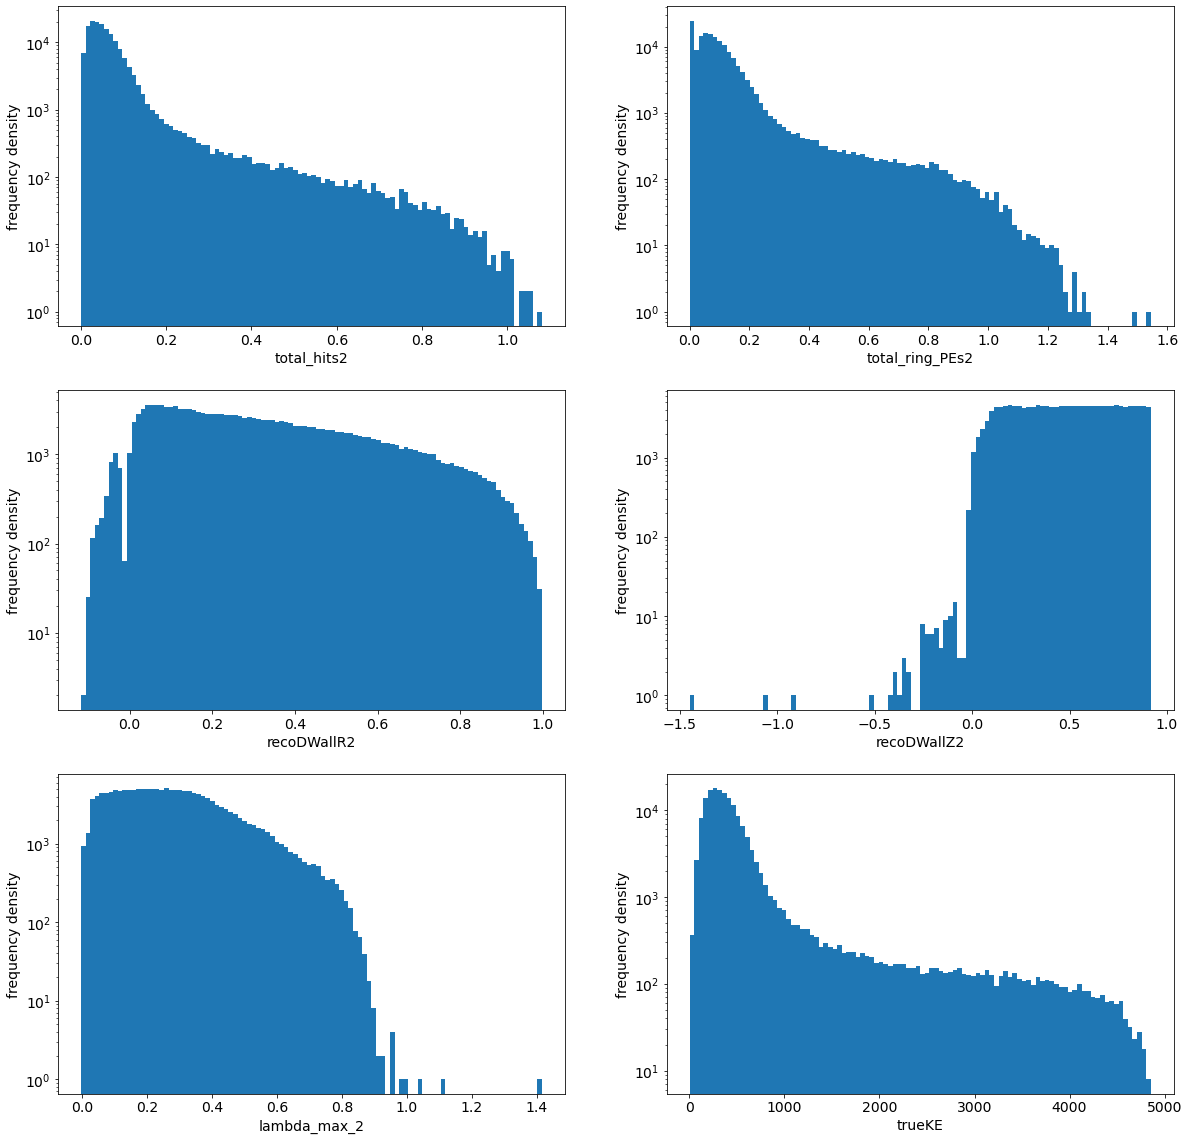

In [12]:
#Plot 1D distributions for the all 6 variables listed in Table 1, in log scale (y-axis)
figs, axs = plt.subplots(3, 2, figsize = (20,20))
column_names = ['total_hits2','total_ring_PEs2','recoDWallR2','recoDWallZ2','lambda_max_2','trueKE']
count = 0
for i in range(3):
    for j in range(2):
        col = column_names[count]
        
        data_to_plot = var.sort_values(by=[col])
            
        
        axs[i,j].hist(data_to_plot[col],bins=100,density=False)
        axs[i,j].semilogy()
        axs[i,j].set_xlabel(col)
        axs[i,j].set_ylabel('frequency density')
        count += 1

### Exercise 2

In [14]:
#inputs is all columns but true KE
#target is true KE
inputs = var.drop(['trueKE'], axis=1)
print(inputs.head())
target = var['trueKE']
print(target)

   total_hits2  total_ring_PEs2  recoDWallR2  recoDWallZ2  lambda_max_2
0     0.023325          0.00000     0.003389     0.458415      0.650854
1     0.010075          0.00000     0.003389     0.458415      0.405903
2     0.080400          0.13070     0.035389     0.753969      0.537975
3     0.011950          0.00000     0.042498     0.083664      0.830098
4     0.142300          0.26265     0.616305     0.164307      0.092105
0          236.327
1          186.765
2          448.481
3          586.647
4          963.822
            ...   
166181     356.525
166182      92.382
166183    2464.460
166184     480.235
166185     480.235
Name: trueKE, Length: 163592, dtype: float64


In [15]:
from sklearn import model_selection
Answer_to_all_questions = 42
# split train - test of dataset 70% 30%
train_data , test_data , train_target , test_target = model_selection . train_test_split (\
inputs , target , test_size =0.3 , random_state = Answer_to_all_questions )
print ( train_data . shape , train_target . shape , test_data . shape , test_target . shape )


(114514, 5) (114514,) (49078, 5) (49078,)


In [17]:
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

#5 inputs 50 nodes, with 1 extra dense layer 
def my_model():
    model = Sequential()
    model.add(Dense (50, input_dim=5, kernel_initializer='normal', activation = 'relu' ))
    model.add(Dropout(0.1))
    model.add(Dense(1 , kernel_initializer = 'normal')) 
    model.compile(loss = 'mean_squared_error' , optimizer = 'adam' )
    return model


model = my_model() #numbers of inputs, number of nodes, number of extra Dense layers 

callbacks_ = [
# if we don’t have an increase of the accuracy for 10 epochs , terminate training .
EarlyStopping ( verbose = True , patience =10 , monitor = 'loss') ,
# Always make sure that we’re saving the model weights with the best accuracy .
ModelCheckpoint('model.h5' , monitor = 'loss' , verbose=0 , save_best_only = True , mode = 'max' )]

In [18]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

#try 90 epochs and 200 batch size to speed it up
N_epochs= 90  
batchSize= 200  

estimators = []
Answer_to_all_questions = 42
np.random.seed(Answer_to_all_questions)

estimators.append(('mlp', KerasRegressor(build_fn = my_model, epochs = N_epochs, batch_size = batchSize, verbose=1)))
pipeline = Pipeline(estimators)
#10 splits
kfold = KFold(n_splits=10, random_state = Answer_to_all_questions, shuffle=True)
results = cross_val_score(pipeline, train_data , train_target , cv = kfold, fit_params = {'mlp__callbacks': callbacks_ }, scoring='r2')

print("Result:","%.7f"%results.mean(), "±", '%.7f'%results.std())

C:\Users\betc\anaconda3\envs\daml\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  


Epoch 1/90
516/516 [==============================] - 3s 4ms/step - loss: 625651.5000
Epoch 2/90
516/516 [==============================] - 2s 4ms/step - loss: 547603.5000
Epoch 3/90
516/516 [==============================] - 3s 5ms/step - loss: 443784.1562
Epoch 4/90
516/516 [==============================] - 3s 5ms/step - loss: 365773.6875
Epoch 5/90
516/516 [==============================] - 3s 5ms/step - loss: 326399.9688
Epoch 6/90
516/516 [==============================] - 2s 3ms/step - loss: 306682.5938
Epoch 7/90
516/516 [==============================] - 1s 3ms/step - loss: 289335.7188
Epoch 8/90
516/516 [==============================] - 2s 3ms/step - loss: 270641.7500
Epoch 9/90
516/516 [==============================] - 3s 6ms/step - loss: 249379.5625
Epoch 10/90
516/516 [==============================] - 3s 5ms/step - loss: 227548.2500
Epoch 11/90
516/516 [==============================] - 2s 4ms/step - loss: 205702.8438
Epoch 12/90
516/516 [==============================]

516/516 [==============================] - 3s 5ms/step - loss: 340378.1562
Epoch 5/90
516/516 [==============================] - 2s 4ms/step - loss: 314725.6875
Epoch 6/90
516/516 [==============================] - 2s 4ms/step - loss: 300131.7188
Epoch 7/90
516/516 [==============================] - 2s 4ms/step - loss: 284509.3438
Epoch 8/90
516/516 [==============================] - 2s 4ms/step - loss: 266504.0312
Epoch 9/90
516/516 [==============================] - 2s 4ms/step - loss: 246050.9219
Epoch 10/90
516/516 [==============================] - 2s 4ms/step - loss: 223409.5938
Epoch 11/90
516/516 [==============================] - 2s 4ms/step - loss: 199991.6875
Epoch 12/90
516/516 [==============================] - 2s 4ms/step - loss: 178390.9531
Epoch 13/90
516/516 [==============================] - 2s 4ms/step - loss: 159466.2812
Epoch 14/90
516/516 [==============================] - 2s 4ms/step - loss: 143549.7656
Epoch 15/90
516/516 [==============================] - 2s 4m

516/516 [==============================] - 3s 5ms/step - loss: 282504.4375
Epoch 8/90
516/516 [==============================] - 2s 4ms/step - loss: 261256.7188
Epoch 9/90
516/516 [==============================] - 2s 4ms/step - loss: 238132.6094
Epoch 10/90
516/516 [==============================] - 2s 5ms/step - loss: 213449.4375
Epoch 11/90
516/516 [==============================] - 3s 5ms/step - loss: 191329.3438
Epoch 12/90
516/516 [==============================] - 2s 4ms/step - loss: 170931.7344
Epoch 13/90
516/516 [==============================] - 2s 4ms/step - loss: 153132.9219
Epoch 14/90
516/516 [==============================] - 2s 4ms/step - loss: 139784.1719
Epoch 15/90
516/516 [==============================] - 2s 4ms/step - loss: 129252.3750
Epoch 16/90
516/516 [==============================] - 2s 4ms/step - loss: 122508.1172
Epoch 17/90
516/516 [==============================] - 2s 4ms/step - loss: 118137.5703
Epoch 18/90
516/516 [==============================] - 2s

516/516 [==============================] - 3s 6ms/step - loss: 115819.4844
Epoch 20/90
516/516 [==============================] - 3s 6ms/step - loss: 115347.3906
Epoch 21/90
516/516 [==============================] - 3s 5ms/step - loss: 114852.8516
Epoch 22/90
516/516 [==============================] - 2s 5ms/step - loss: 114620.1172
Epoch 23/90
516/516 [==============================] - 3s 6ms/step - loss: 114378.0469
Epoch 24/90
516/516 [==============================] - 3s 6ms/step - loss: 114147.1562
Epoch 25/90
516/516 [==============================] - 3s 6ms/step - loss: 114154.2422
Epoch 26/90
516/516 [==============================] - 3s 6ms/step - loss: 113836.6562
Epoch 27/90
516/516 [==============================] - 3s 6ms/step - loss: 113622.3672
Epoch 28/90
516/516 [==============================] - 3s 6ms/step - loss: 113651.1328
Epoch 29/90
516/516 [==============================] - 3s 6ms/step - loss: 113573.5469
Epoch 30/90
516/516 [==============================] - 

516/516 [==============================] - 3s 5ms/step - loss: 113153.1953
Epoch 37/90
516/516 [==============================] - 2s 4ms/step - loss: 113190.4062
Epoch 38/90
516/516 [==============================] - 2s 4ms/step - loss: 112962.1250
Epoch 39/90
516/516 [==============================] - 2s 4ms/step - loss: 112754.7734
Epoch 40/90
516/516 [==============================] - 2s 4ms/step - loss: 112645.3359
Epoch 41/90
516/516 [==============================] - 2s 4ms/step - loss: 112661.2422
Epoch 42/90
516/516 [==============================] - 2s 4ms/step - loss: 112955.9844
Epoch 43/90
516/516 [==============================] - 2s 4ms/step - loss: 112654.4297
Epoch 44/90
516/516 [==============================] - 2s 4ms/step - loss: 112867.9219
Epoch 45/90
516/516 [==============================] - 2s 5ms/step - loss: 112856.5547
Epoch 46/90
516/516 [==============================] - 2s 5ms/step - loss: 112762.6875
Epoch 47/90
516/516 [==============================] - 

516/516 [==============================] - 2s 3ms/step - loss: 111305.5234
Epoch 61/90
516/516 [==============================] - 2s 3ms/step - loss: 111477.0859
Epoch 62/90
516/516 [==============================] - 2s 3ms/step - loss: 111280.4141
Epoch 63/90
516/516 [==============================] - 2s 3ms/step - loss: 110765.3984
Epoch 64/90
516/516 [==============================] - 2s 3ms/step - loss: 111174.6875
Epoch 65/90
516/516 [==============================] - 2s 3ms/step - loss: 111371.8438
Epoch 66/90
516/516 [==============================] - 2s 3ms/step - loss: 110941.1016
Epoch 67/90
516/516 [==============================] - 2s 3ms/step - loss: 110830.0000
Epoch 68/90
516/516 [==============================] - 2s 3ms/step - loss: 110897.3438
Epoch 69/90
516/516 [==============================] - 2s 3ms/step - loss: 111022.8203
Epoch 70/90
516/516 [==============================] - 2s 3ms/step - loss: 111039.0156
Epoch 71/90
516/516 [==============================] - 

516/516 [==============================] - 2s 4ms/step - loss: 112804.5547
Epoch 20/90
516/516 [==============================] - 2s 4ms/step - loss: 112181.7656
Epoch 21/90
516/516 [==============================] - 2s 4ms/step - loss: 111624.4062
Epoch 22/90
516/516 [==============================] - 3s 5ms/step - loss: 111491.1172
Epoch 23/90
516/516 [==============================] - 3s 5ms/step - loss: 111487.1016
Epoch 24/90
516/516 [==============================] - 3s 5ms/step - loss: 111577.1484
Epoch 25/90
516/516 [==============================] - 3s 5ms/step - loss: 111407.5469
Epoch 26/90
516/516 [==============================] - 3s 6ms/step - loss: 111081.5781
Epoch 27/90
516/516 [==============================] - 3s 6ms/step - loss: 111227.8516
Epoch 28/90
516/516 [==============================] - 3s 5ms/step - loss: 111096.7891
Epoch 29/90
516/516 [==============================] - 3s 6ms/step - loss: 110824.5469
Epoch 30/90
516/516 [==============================] - 

516/516 [==============================] - 2s 3ms/step - loss: 111018.3906
Epoch 61/90
516/516 [==============================] - 2s 3ms/step - loss: 111165.0703
Epoch 62/90
516/516 [==============================] - 2s 3ms/step - loss: 111044.6328
Epoch 63/90
516/516 [==============================] - 2s 3ms/step - loss: 111263.4531
Epoch 64/90
516/516 [==============================] - 2s 3ms/step - loss: 111019.3203
Epoch 65/90
516/516 [==============================] - 2s 4ms/step - loss: 110922.8281
Epoch 66/90
516/516 [==============================] - 2s 4ms/step - loss: 111022.7969
Epoch 67/90
516/516 [==============================] - 2s 3ms/step - loss: 111072.6641
Epoch 68/90
516/516 [==============================] - 2s 4ms/step - loss: 110689.3984
Epoch 69/90
516/516 [==============================] - 2s 3ms/step - loss: 110946.9922
Epoch 70/90
516/516 [==============================] - 2s 3ms/step - loss: 111097.4844
Epoch 71/90
516/516 [==============================] - 

516/516 [==============================] - 2s 3ms/step - loss: 110379.3281
Epoch 69/90
516/516 [==============================] - 2s 3ms/step - loss: 110488.2500
Epoch 70/90
516/516 [==============================] - 2s 3ms/step - loss: 110698.7109
Epoch 71/90
516/516 [==============================] - 2s 3ms/step - loss: 110628.6250
Epoch 72/90
516/516 [==============================] - 2s 4ms/step - loss: 110345.6172
Epoch 73/90
516/516 [==============================] - 2s 3ms/step - loss: 110311.5000
Epoch 74/90
516/516 [==============================] - 2s 3ms/step - loss: 110293.1484
Epoch 75/90
516/516 [==============================] - 2s 3ms/step - loss: 110387.2578
Epoch 76/90
516/516 [==============================] - 2s 4ms/step - loss: 110493.5078
Epoch 77/90
516/516 [==============================] - 2s 3ms/step - loss: 110489.8281
Epoch 00077: early stopping
58/58 [==============================] - 0s 2ms/step
Result: 0.7100316 ± 0.0164372


In [19]:
#NN regressor gives R square score of 71%

In [20]:
#fit model
history = model.fit( train_data , train_target , batch_size = batchSize , epochs = N_epochs ,verbose=1 , validation_data=(test_data, test_target) , callbacks = callbacks_ )

Epoch 1/90
573/573 [==============================] - 5s 6ms/step - loss: 616926.6875 - val_loss: 570594.1875
Epoch 2/90
573/573 [==============================] - 3s 6ms/step - loss: 504581.6250 - val_loss: 433898.2812
Epoch 3/90
573/573 [==============================] - 2s 4ms/step - loss: 384821.3125 - val_loss: 342264.7812
Epoch 4/90
573/573 [==============================] - 3s 6ms/step - loss: 327294.8125 - val_loss: 310772.0938
Epoch 5/90
573/573 [==============================] - 4s 6ms/step - loss: 305758.7812 - val_loss: 292637.5000
Epoch 6/90
573/573 [==============================] - 3s 6ms/step - loss: 286851.9062 - val_loss: 271856.7500
Epoch 7/90
573/573 [==============================] - 3s 5ms/step - loss: 264433.3125 - val_loss: 247815.0469
Epoch 8/90
573/573 [==============================] - 3s 6ms/step - loss: 239279.4688 - val_loss: 220743.5625
Epoch 9/90
573/573 [==============================] - 3s 6ms/step - loss: 212593.8906 - val_loss: 193864.1250
Epoch 10/9

Epoch 75/90
573/573 [==============================] - 4s 7ms/step - loss: 107222.6719 - val_loss: 101825.6641
Epoch 76/90
573/573 [==============================] - 4s 7ms/step - loss: 106964.3828 - val_loss: 101745.6328
Epoch 77/90
573/573 [==============================] - 4s 8ms/step - loss: 106727.3516 - val_loss: 101663.8516
Epoch 78/90
573/573 [==============================] - 4s 7ms/step - loss: 107115.4062 - val_loss: 101577.3516
Epoch 79/90
573/573 [==============================] - 4s 7ms/step - loss: 106917.5703 - val_loss: 101493.2109
Epoch 80/90
573/573 [==============================] - 4s 7ms/step - loss: 106793.2578 - val_loss: 101412.2188
Epoch 81/90
573/573 [==============================] - 4s 7ms/step - loss: 106859.7812 - val_loss: 101328.3984
Epoch 82/90
573/573 [==============================] - 4s 7ms/step - loss: 106432.3047 - val_loss: 101254.9219
Epoch 83/90
573/573 [==============================] - 4s 7ms/step - loss: 106342.4375 - val_loss: 101165.5703
E

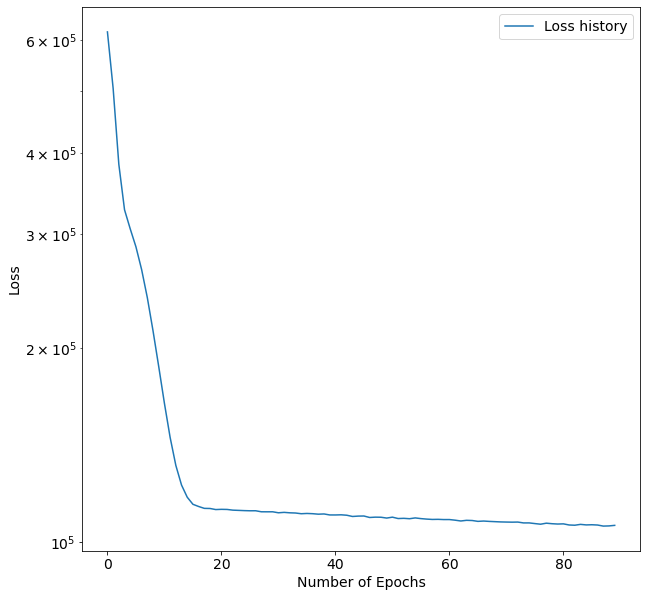

In [21]:
#Generating and plotting the loss and val_loss functions from our history fit
loss = history.history['loss']
plt.plot(loss, label='Loss history')
plt.semilogy()
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()

In [22]:
#Use method predict to get an array of predicted muon-energy values using test data.
#Compare it with test target by creating a “predicted” (y-axis) vs. “actual” (x-axis) scatter plot of muon energy values

In [23]:
from sklearn.model_selection import cross_val_predict
#Obtain predicted values from NN regressor
predict = model.predict(test_data)

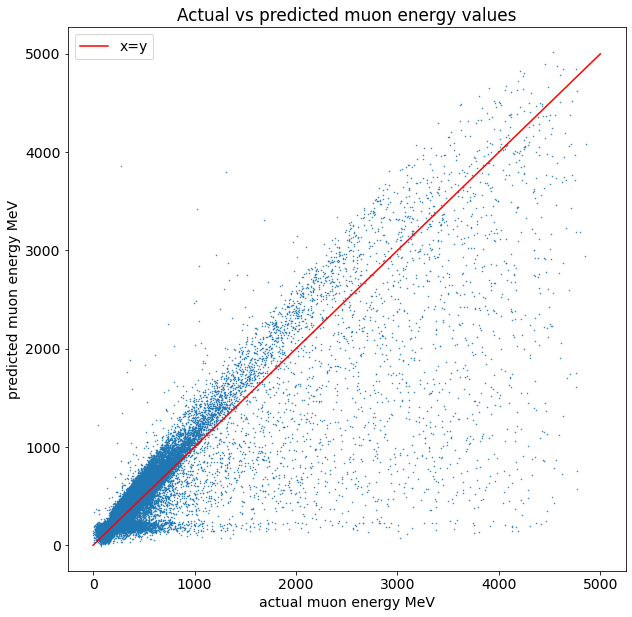

In [88]:
plt.scatter(test_target,predict,marker='.',s=1)
x = np.linspace(0,5000)
plt.plot(x,x,'r-',label='x=y')
plt.legend()
plt.xlabel('actual muon energy MeV')
plt.ylabel('predicted muon energy MeV')
plt.title('Actual vs predicted muon energy values')
plt.show()

in the higher energy regions of actual muon energy, the predictions deviate and are predicted to be higher energies, the trend is slightly above the y=x. There is also a line at actual muon energies from 0 - ~1000 where the predicted energy is very low, this may be where the algorithm is less successful.

### Exercise #3 (5 points):


In [50]:
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV

In [51]:
from sklearn . ensemble import GradientBoostingRegressor
from sklearn . model_selection import HalvingGridSearchCV
#apply gradient boosting regressor on the training data
gbr0 = GradientBoostingRegressor( n_estimators =100)
gbr0.fit(train_data, train_target.ravel())

GradientBoostingRegressor()

In [52]:
#get R squared scores
score1= gbr0.score(train_data, train_target)
score2= gbr0.score(test_data, test_target)

In [53]:
score1,score2

(0.7830727956686762, 0.7818040867193339)

R2 values are very similar so not suffering from over training - R squared values of 78% which is better than for the NN regressor which was 71%

In [55]:
param_grid_ = {'n_estimators':[100],'learning_rate': [0.1 , 0.05],'max_depth':[5 , 10],'min_samples_leaf':[50 ,100],}
#8 jobs to run in parallel
njobs_ = 8
np.random.seed(42)
gbr = GradientBoostingRegressor()
#use halving grid search to speed up optimisation
classifier = HalvingGridSearchCV (estimator = gbr, cv = kfold, param_grid = param_grid_,n_jobs = njobs_, verbose =1)
classifier.fit(train_data, train_target.ravel())
print("Best estimator :", classifier.best_estimator_)

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 38171
max_resources_: 114514
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 8
n_resources: 38171
Fitting 10 folds for each of 8 candidates, totalling 80 fits
----------
iter: 1
n_candidates: 3
n_resources: 114513
Fitting 10 folds for each of 3 candidates, totalling 30 fits
 Best estimator : GradientBoostingRegressor(learning_rate=0.05, max_depth=10, min_samples_leaf=50)


In [71]:
#get plot learning curve from nn utils
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


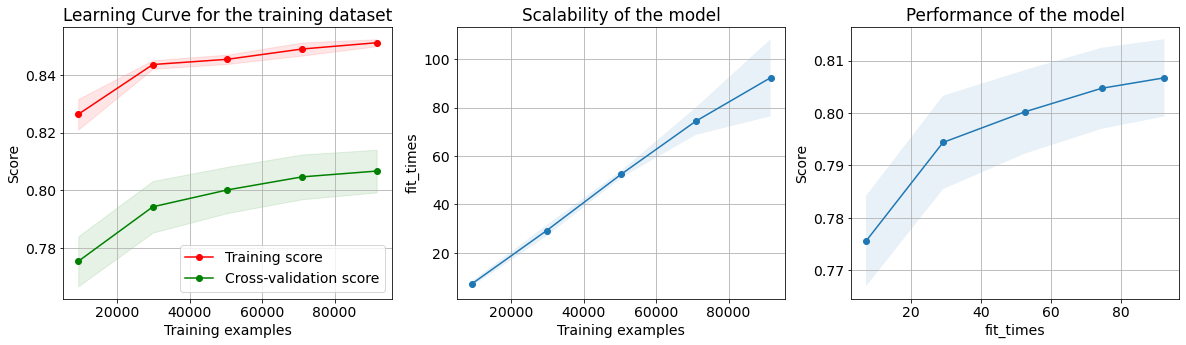

In [69]:
# get training data set performance of the optimised regressor
GBRT = classifier.best_estimator_

title =  "Learning Curve for the training dataset"
plot_learning_curve(GBRT, title, train_data, train_target, ylim=None, cv=None, n_jobs=8)

plt.show()

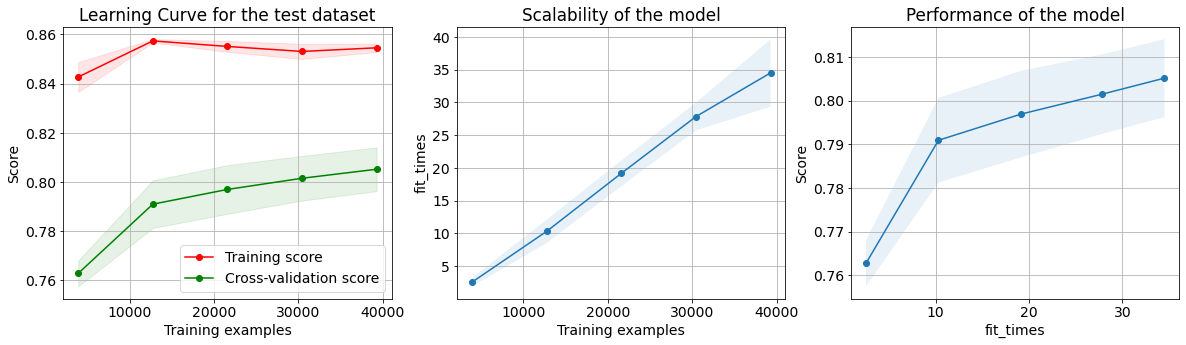

In [70]:
# get testing data set performance of the optimised regressor
GBRT = classifier.best_estimator_

title =  "Learning Curve for the test dataset"
plot_learning_curve(GBRT, title, test_data, test_target, ylim=None, cv=None, n_jobs=8)

plt.show()

In [91]:
#Running cross_val_score on the test dataset to determine the R^2 score 
np.random.seed(42)
results = cross_val_score(GBRT_opt, test_data, test_target, cv = kfold, scoring='r2')

In [92]:
print("Score:","%.4f"%results.mean(), "±", '%.4f'%results.std())

Score: 0.8049 ± 0.0175


In [72]:
#Creating a new GBRT regressor with the optimised parameters from the optimised regressor
GBRT_opt = GradientBoostingRegressor(learning_rate=GBRT.learning_rate, n_estimators=GBRT.n_estimators, min_samples_leaf=GBRT.min_samples_leaf, max_depth=GBRT.max_depth)

R squared value of 80% best result so far due to using the optimized parameters from the previous GBRT

In [75]:
#Using the method fit on the training dataset 
GBRT_opt.fit(train_data, train_target.ravel())

GradientBoostingRegressor(learning_rate=0.05, max_depth=10, min_samples_leaf=50)

In [77]:
#getting predictions of the test dataset
predict_GBRT = GBRT_opt.predict(test_data)

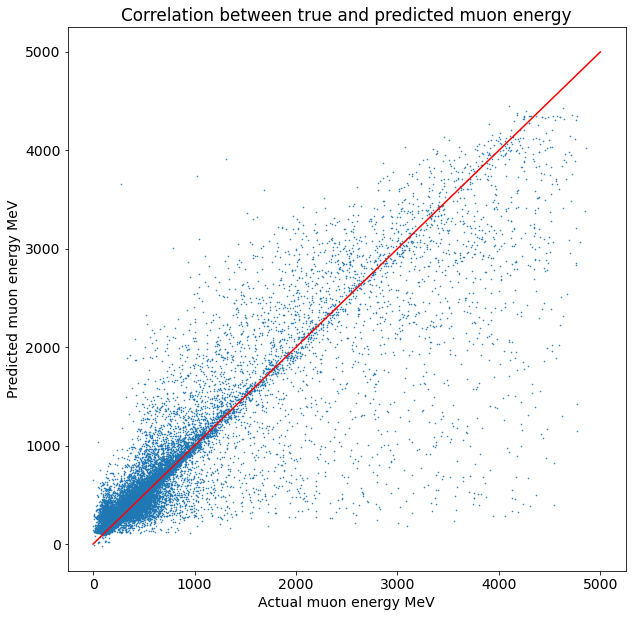

In [81]:
#Plotting a y=x diagonal line to investigate the accuracy of our predicted values 
plt.plot(x, x,'r')

#Plotting the true vs predicted muon energy
plt.scatter(test_target, predict_GBRT, s=0.3)
plt.ylabel('Predicted muon energy MeV')
plt.xlabel('Actual muon energy MeV')
plt.title('Correlation between true and predicted muon energy')

plt.show()

As Gradient Boosted Regression Trees give better results, the predicted muon energy deviates less from actual muon energy, there is no branching at the lower energies, and the data follows the y=x line.

Use method feature importances on the optimised regressor to get an insight as to which input features have the greatest impact on the predictive power of the algorithm. Order the input features according to their weight. Create a bar chart (matplotlib.pyplot.bar) with the ranked weights of the 5 input features.

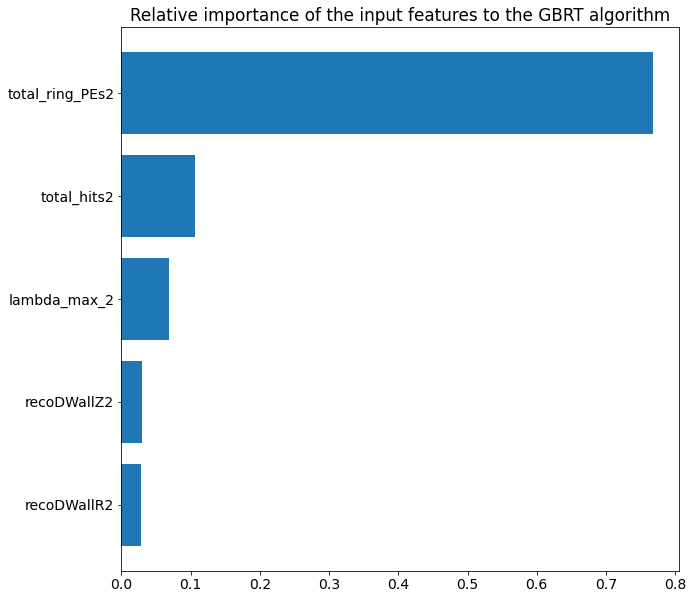

In [87]:
#PLotting a bar chart to get an insight of which input fetaures of the 'train' dataset have the most impact on the predictive power of the algorithm
feature_importance = GBRT_opt.feature_importances_
#return the indices of feature_importance elements as if the elements of that array would be sorted in an ascending order
sorted_i = np.argsort(feature_importance) 
pos = [1,2,3,4,5]
plt.barh(pos, feature_importance[sorted_i], align="center") #sort the input features on the bar plot in a bottom-up way (i.e.according to their weight)
plt.yticks(pos, np.array(inputs.columns)[sorted_index]) #convert the columns names of our dataset from a dtype of 'object' to an array and sort the y-ticks labels according to the indeces order
plt.title("Relative importance of the input features to the GBRT algorithm")
plt.show()

Here we can see that the most important feature in the algorithm is the total number of PMT hits that have been assigned to cherenkov rings, as the hits determine how many muon neutrinos there have been incident in the detector.